In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

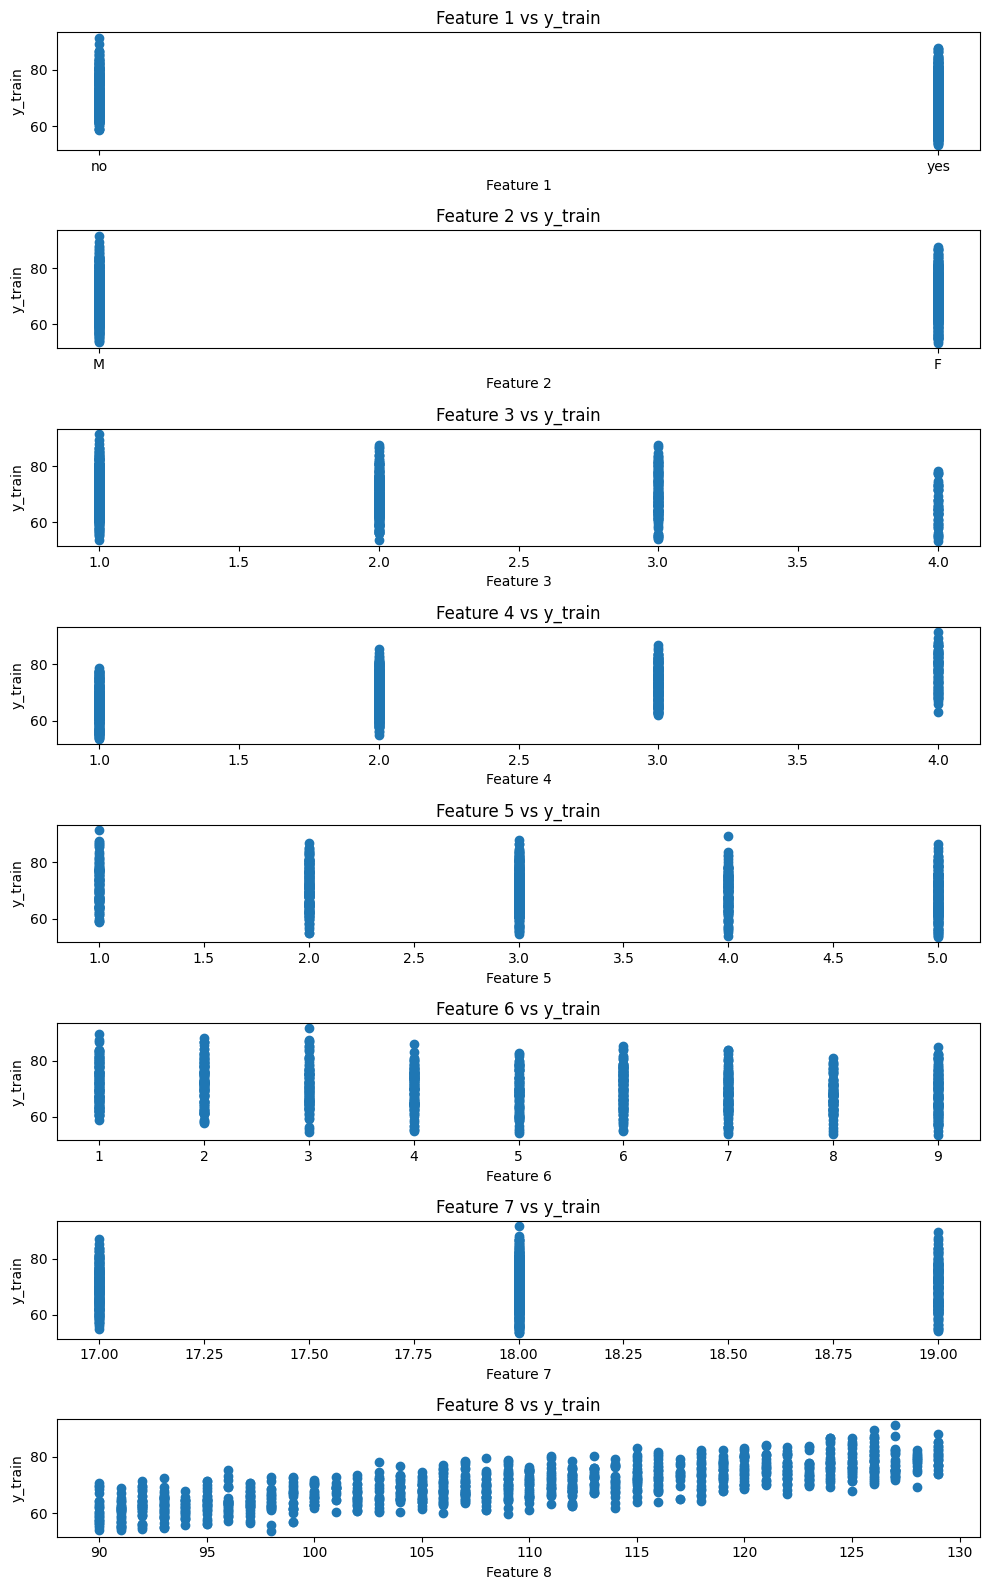

X train [[ 0.  1.  1. ...  5.  1. 28.]
 [ 1.  1.  1. ...  6.  2. 17.]
 [ 1.  1.  2. ...  4.  1. 18.]
 ...
 [ 1.  1.  1. ...  4.  0. 33.]
 [ 1.  0.  0. ...  7.  0. 14.]
 [ 1.  1.  0. ...  5.  1. 38.]]
Y train [[73.13]
 [67.78]
 [70.84]
 [66.68]
 [71.88]
 [73.84]
 [71.47]
 [74.48]
 [73.48]
 [91.44]
 [79.38]
 [62.51]
 [75.  ]
 [62.64]
 [53.95]
 [68.26]
 [67.65]
 [76.44]
 [77.44]
 [78.45]
 [77.23]
 [70.31]
 [80.  ]
 [69.9 ]
 [65.42]
 [67.38]
 [73.17]
 [81.11]
 [82.87]
 [72.4 ]
 [65.  ]
 [75.49]
 [73.74]
 [68.4 ]
 [64.06]
 [79.62]
 [60.55]
 [79.06]
 [61.99]
 [77.3 ]
 [81.22]
 [67.43]
 [72.16]
 [67.11]
 [67.78]
 [62.99]
 [65.14]
 [56.96]
 [73.75]
 [64.25]
 [71.61]
 [66.72]
 [61.73]
 [75.25]
 [80.37]
 [80.59]
 [67.13]
 [75.13]
 [78.27]
 [58.17]
 [76.88]
 [62.38]
 [63.09]
 [73.21]
 [72.03]
 [66.38]
 [78.91]
 [76.35]
 [65.27]
 [80.82]
 [60.83]
 [65.23]
 [74.39]
 [71.04]
 [68.27]
 [81.3 ]
 [72.11]
 [69.73]
 [63.11]
 [65.88]
 [61.36]
 [74.8 ]
 [72.86]
 [69.6 ]
 [67.93]
 [76.35]
 [66.52]
 [72.81]


In [9]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = pd.read_excel('Training data.xlsx').iloc[:, :8].to_numpy()
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features

def plot_features(data, y_train):
    num_features = data.shape[1]
    fig, axes = plt.subplots(nrows=num_features, figsize=(10, 2*num_features))
    for i in range(num_features):
        axes[i].scatter(data[:, i], y_train)
        axes[i].set_xlabel(f'Feature {i+1}')
        axes[i].set_ylabel('y_train')
        axes[i].set_title(f'Feature {i+1} vs y_train')
    plt.tight_layout()
    plt.show()

plot_features(x_train, y_train)


# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers


# Label encoding function
def label_encode(data):
    for column in range(data.shape[1]):
        if data[:, column].dtype == 'object':
            unique_vals = np.unique(data[:, column])
            val_to_int = {val: i for i, val in enumerate(unique_vals)}
            data[:, column] = [val_to_int[val] for val in data[:, column]]
    return data


# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):

  x_train = label_encode(x_train)

  return x_train

x_train = feature_changing(x_train)
x_train = x_train.astype(np.float64)
print("X train",x_train)
print("Y train",y_train)

In [10]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
  # ---------
    # Calculate the mean and standard deviation for each feature
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)

    # Apply Z-score normalization
    x_train = (x_train - x_mean) / x_std


    return x_train,x_std,x_mean

x_train, x_std, x_mean = z_score(x_train)


In [11]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
  # ---------
     # Number of training examples
    m = x_train.shape[0]

    # Calculate the predictions
    predictions = np.dot(x_train, w) + b

    # Calculate the Mean Squared Error
    loss = np.mean((predictions - y_train) ** 2)
   # loss = (1 / (2 * m)) * np.sum((predictions - y_train) ** 2)


    return loss

In [12]:
def gradient_descent(x_train,y_train,w,b):

    learning_rate = 0.01
    m = x_train.shape[0]

    predictions = np.dot(x_train, w) + b

    dw = (1 / m) * np.dot(x_train.T, (predictions - y_train))
    db = (1 / m) * np.sum(predictions - y_train)

    w -= learning_rate * dw
    b -= learning_rate * db

    return w,b

In [13]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5:
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Optimization required, your accuracy is 2.0%
